In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

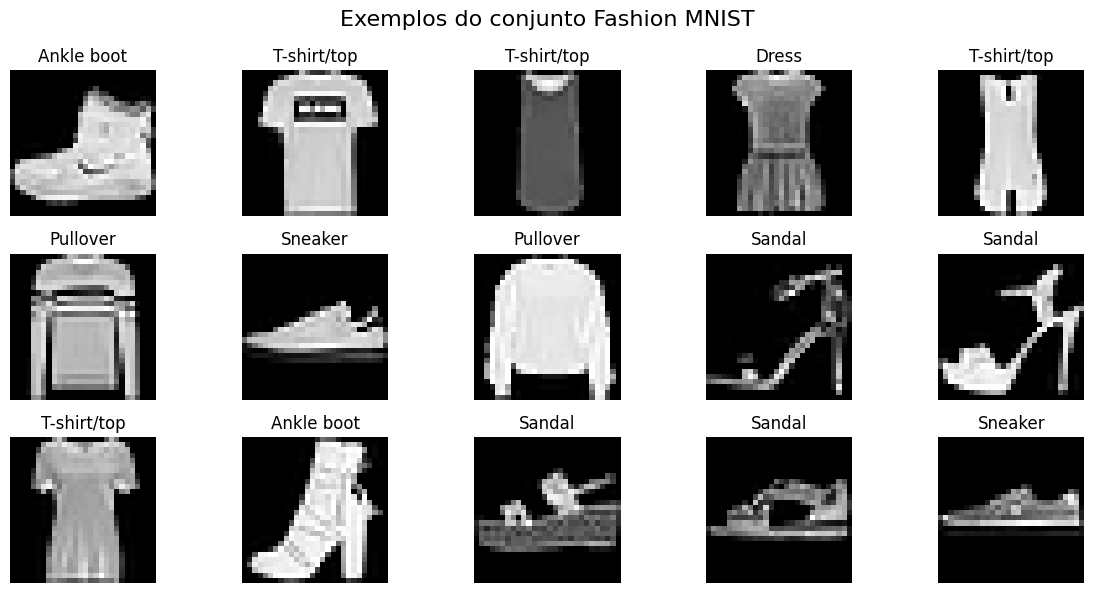

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train_full[i], cmap="gray")
    plt.title(class_names[y_train_full[i]])
    plt.axis("off")

plt.suptitle("Exemplos do conjunto Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

X_train_full: Conjunto completo de features.

y_train_full: Conjunto completo de labels.

**Criação do conjunto de validação:**

X_valid = Primeiras 5000 amostras de X_train_full (normalizadas por /255.0).

y_valid = Primeiras 5000 labels correspondentes de y_train_full.

**Criação do conjunto de treino:**


X_train = Amostras de X_train_full a partir da posição 5000 até o final (normalizadas).

y_train = Labels correspondentes a partir da posição 5000.

**2. Normalização dos Dados**

/255.0: Transforma os valores dos pixels (originalmente de 0 a 255) em escala 0 a 1, o que:

Acelera a convergência durante o treinamento.

Evita problemas com disparidade de magnitudes (importante para redes neurais).

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
y_valid.shape

(5000,)

In [ ]:
class_names[y_train[0]]

'Coat'

**Camadas do Modelo:**
Input(shape=[28, 28])

**Camada de entrada:** Define o formato dos dados de entrada (28x28).

**Observação:** Essa camada não é contabilizada como uma camada aprendível (não tem pesos), apenas especifica a forma da entrada.


**Flatten()**

**Camada de achatamento:** Converte a matriz 2D (28x28) em um vetor 1D de 784 elementos.

Também não tem pesos, mas é considerada parte da arquitetura.



Dense(300, activation="relu")

Primeira camada oculta: 300 neurônios com ativação ReLU.

Dense(100, activation="relu")

Segunda camada oculta: 100 neurônios com ativação ReLU.

Dense(10, activation="softmax")

Camada de saída: 10 neurônios com ativação Softmax (para classificação em 10 classes).

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Total de camadas (incluindo Input e Flatten): 5 (mas apenas 3 são aprendíveis).

**Camadas com pesos treináveis (Dense): 3.**

Na prática, quando se pergunta "quantas camadas tem o modelo?", a resposta mais comum é 3 (contando apenas as camadas densas, que são as que possuem parâmetros para aprender).

**Observação:**
Input e Flatten são camadas de pré-processamento, mas não participam do aprendizado.

Se o contexto for apenas camadas ocultas + saída, o modelo tem 3 camadas (Dense).

In [ ]:
model=keras.models.Sequential([keras.layers.Input(shape=[28,28]),
                               keras.layers.Flatten(),
                               keras.layers.Dense(300, activation="relu"),
                               keras.layers.Dense(100, activation ="relu"),
                               keras.layers.Dense(10, activation = "softmax")
                               ])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

**Arquitetura do Modelo**
O modelo é uma rede neural Sequential com 4 camadas (1 de achatamento + 3 densas):

**flatten_1 (Flatten)**

Função: Transforma a entrada 2D (28x28) em 1D (784 pixels).

Output Shape: (None, 784)

None: Espaço reservado para o batch size (lote de amostras).

784: 28 × 28 pixels (vetor unidimensional).

Parâmetros: 0 (apenas reorganiza os dados).

**dense_3 (Dense)**

Neurônios: 300 com ativação ReLU.

Output Shape: (None, 300)

Parâmetros:

Cada um dos 784 pixels conectado a 300 neurônios: 784 × 300 = 235,200.

Bias: +300 (um por neurônio) → Total: 235,500.

**dense_4 (Dense)**

Neurônios: 100 com ativação ReLU.

Output Shape: (None, 100)

Parâmetros:

300 × 100 = 30,000 (pesos) + 100 (bias) = 30,100.

**dense_5 (Dense)**

Neurônios: 10 com ativação Softmax (para classificação em 10 classes).

Output Shape: (None, 10)

Parâmetros:

100 × 10 = 1,000 (pesos) + 10 (bias) = 1,010.



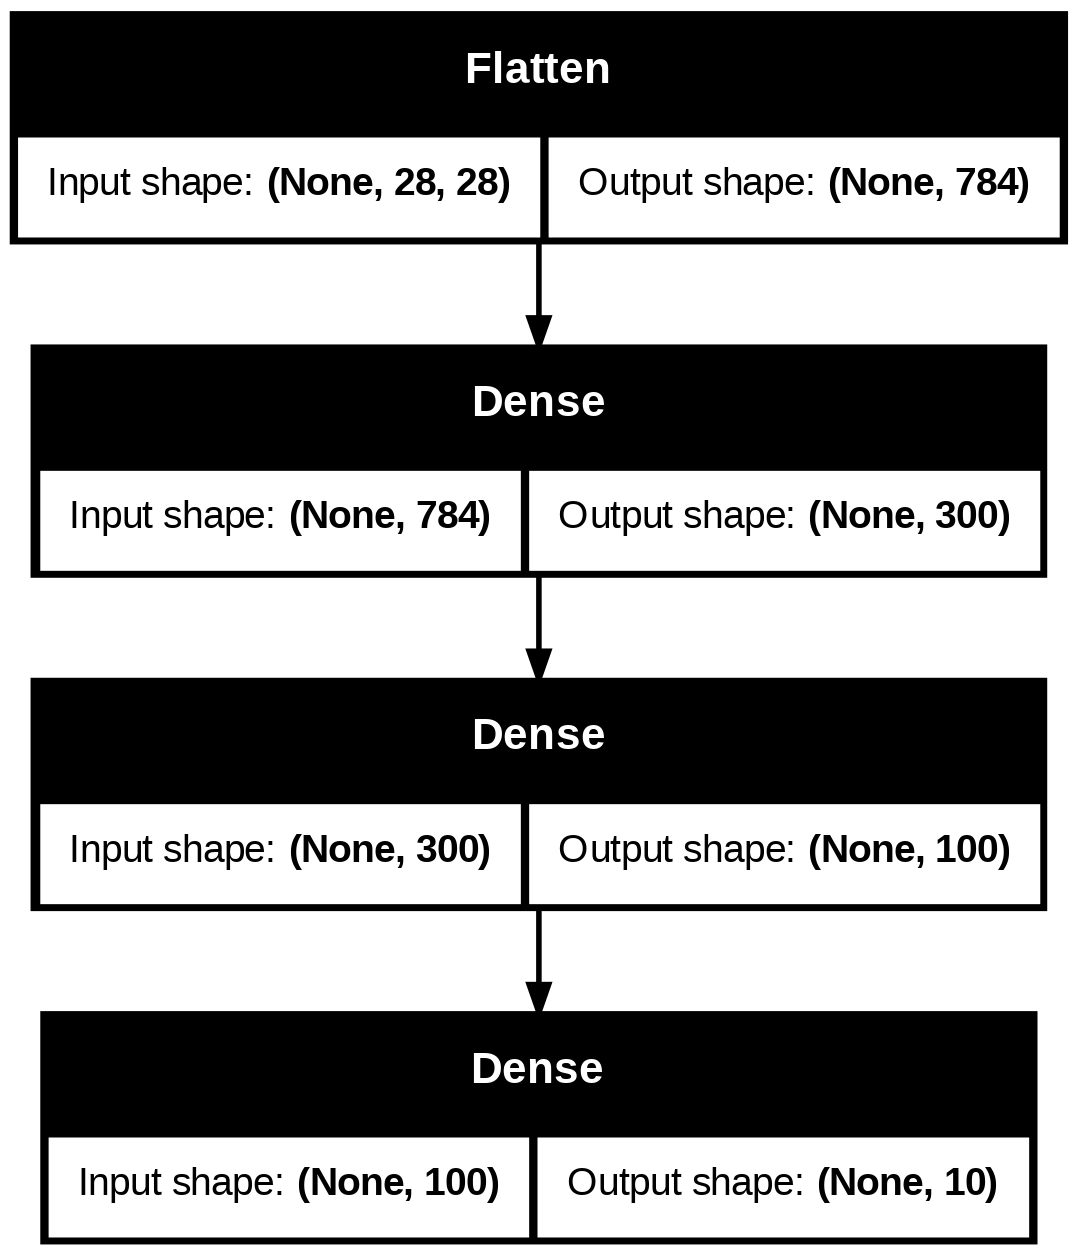

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

Função de Perda (loss)

**sparse_categorical_crossentropy:**

Usada para problemas de classificação multiclasse (ex.: MNIST com 10 classes).

Difere de categorical_crossentropy porque aceita rótulos como inteiros (ex.: y_train = [2, 5, 0, ...]) em vez de one-hot encoded ([[0,0,1,0,...], ...]).

Calcula a divergência entre a distribuição prevista e a real.

**Otimizador (optimizer)**

**sgd (Stochastic Gradient Descent): **

Atualiza os pesos do modelo usando o gradiente da função de perda.

Hiperparâmetros padrão:

Taxa de aprendizagem (lr=0.01).

Momentum (momentum=0.0).

**metrics**

**"accuracy":**

Acompanha a porcentagem de previsões corretas durante o treinamento/validação.

Útil para monitorar o desempenho em tempo real.

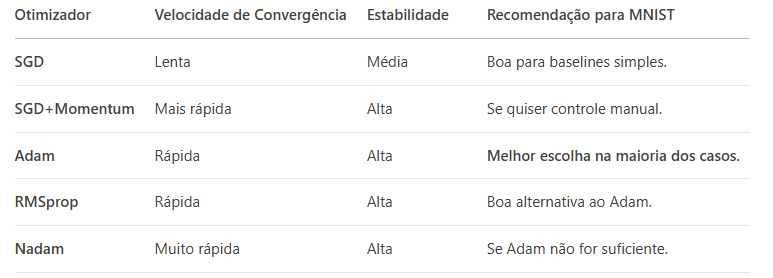

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6875 - loss: 0.9817 - val_accuracy: 0.8262 - val_loss: 0.5004
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8245 - loss: 0.5037 - val_accuracy: 0.8332 - val_loss: 0.4626
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8413 - loss: 0.4487 - val_accuracy: 0.8506 - val_loss: 0.4189
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8545 - loss: 0.4189 - val_accuracy: 0.8540 - val_loss: 0.4106
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.4036 - val_accuracy: 0.8580 - val_loss: 0.4033
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8684 - loss: 0.3778 - val_accuracy: 0.8738 - val_loss: 0.3739
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8681 - loss: 0.3750 - val_accuracy: 0.8706 - val_loss: 0.3667
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8746 - loss: 0.3570 - 

**Treinamento do modelo MLP**

Acurácia final de 91,94% no treino e 89,46% na validação (ótimo resultado para MNIST com MLP simples).


Perda final: loss: 0.2246 (treino) e val_loss: 0.2973 (validação) — o modelo aprendeu de forma estável.

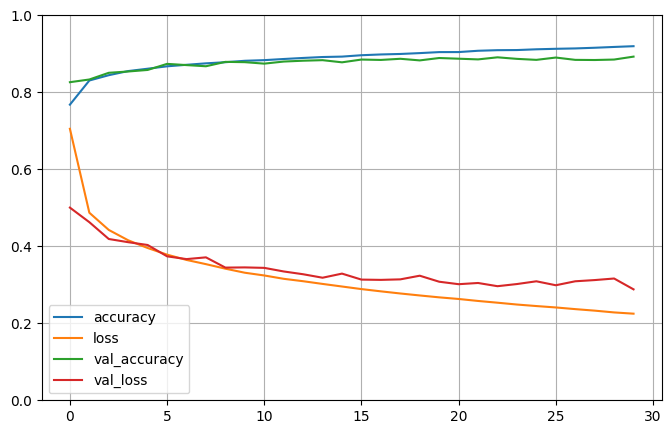

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 66.1336


[70.47728729248047, 0.8420000076293945]

In [ ]:
##Previsão para novos dados
X_new = X_test[:5]  # por exemplo, os 5 primeiros dados de teste

y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)

print("Previsões:", y_pred)
print("Classes reais:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Previsões: [9 2 1 1 6]
Classes reais: [9 2 1 1 6]


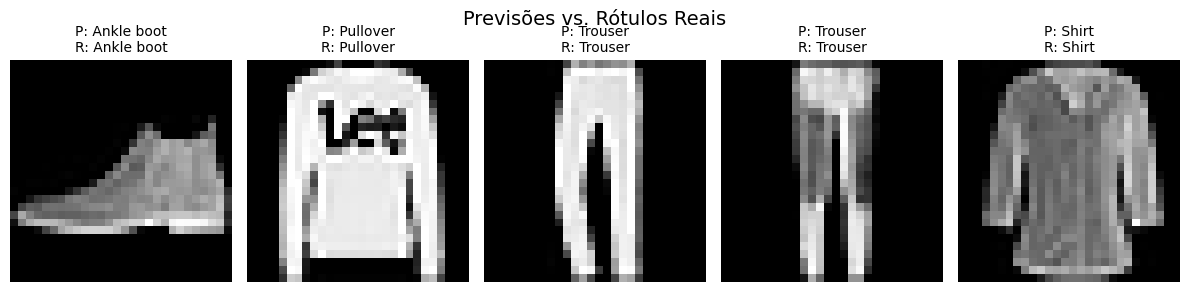

In [ ]:
##Vamos exibir as 5 primeiras imagens com as classes previstas e reais
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_new[i], cmap="gray")
    plt.title(f"P: {class_names[y_pred[i]]}\nR: {class_names[y_test[i]]}", fontsize=10)
    plt.axis("off")

plt.suptitle("Previsões vs. Rótulos Reais", fontsize=14)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


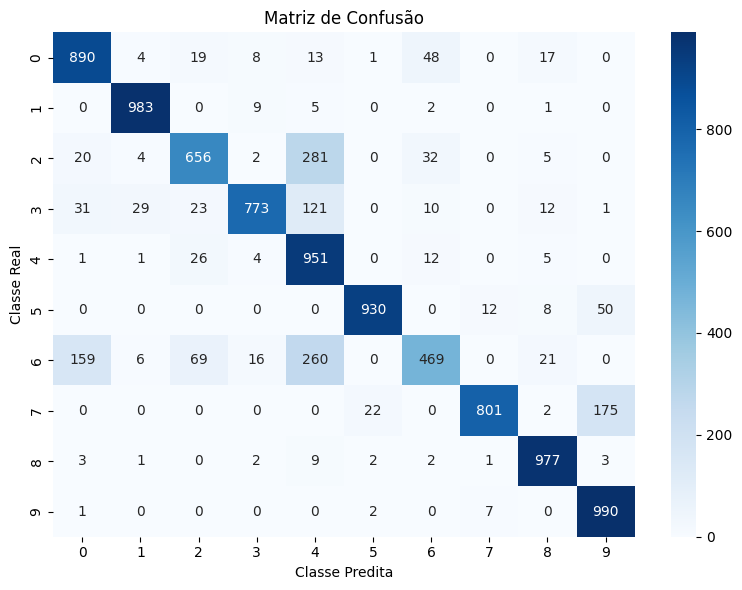


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.96      0.98      0.97      1000
           2       0.83      0.66      0.73      1000
           3       0.95      0.77      0.85      1000
           4       0.58      0.95      0.72      1000
           5       0.97      0.93      0.95      1000
           6       0.82      0.47      0.60      1000
           7       0.98      0.80      0.88      1000
           8       0.93      0.98      0.95      1000
           9       0.81      0.99      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000



In [ ]:
# Ajustar o formato de entrada se necessário
X_test_reshaped = X_test.reshape(-1, 28, 28)

# Fazer predições
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.tight_layout()
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

**Acurácia no teste: 85%**

classification_report mostra métricas por classe:

precision: quão precisa foi a predição daquela classe.

recall: quão bem identificou todos os exemplos daquela classe.

f1-score: média harmônica entre precisão e recall.

MLP X CNN

In [ ]:
##Carregando dados MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255.0  # Flatten + normalização
X_test = X_test.reshape(-1, 28*28) / 255.0

##Criando MLP
model_mlp = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (0-9)
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8811 - loss: 0.4188 - val_accuracy: 0.9628 - val_loss: 0.1190
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9669 - loss: 0.1095 - val_accuracy: 0.9679 - val_loss: 0.1023
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9792 - loss: 0.0685 - val_accuracy: 0.9757 - val_loss: 0.0761
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0490 - val_accuracy: 0.9757 - val_loss: 0.0796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9782 - val_loss: 0.0718


Uma CNN (Rede Neural Convolucional) é um tipo de rede neural profunda especializada em processar dados com estrutura espacial, como imagens, vídeos e até sinais. Ela usa operações de convolução para extrair automaticamente características hierárquicas (como bordas, texturas e objetos) diretamente dos pixels, sem necessidade de pré-processamento manual.

**Principais Características**:

Camadas Convolucionais (Conv2D)

Aplicam filtros (kernels) que detectam padrões locais (ex.: bordas, cores).

Preservam a relação espacial dos pixels.

Camadas de Pooling (ex.: MaxPooling2D)

Reduzem a dimensionalidade (tamanho da imagem), mantendo as características mais importantes.

Camadas Densas (Dense) no final

Classificam as features extraídas (ex.: "é um número 5?" no MNIST).

**Por que CNNs são boas para imagens?**

Invariância a translações: Detectam padrões mesmo se aparecerem em posições diferentes.

Hierarquia de features: Aprendem desde bordas simples até objetos complexos.

Eficiência: Menos parâmetros que redes densas tradicionais (graças ao compartilhamento de pesos).

**Exemplo de Aplicações:**
Reconhecimento de imagens (ex.: MNIST, CIFAR-10).

Detecção de objetos (ex.: YOLO, Faster R-CNN).

Segmentação semântica (ex.: U-Net).



**Diferença para Redes Densas (MLP):**

MLP: Ignora a estrutura espacial (trata pixels como lista).

CNN: Preserva a localização e aprende padrões locais.

In [ ]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

##Construindo um CNN
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, epochs=5, validation_data=(X_test_cnn, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9162 - loss: 0.2720 - val_accuracy: 0.9852 - val_loss: 0.0439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0390 - val_accuracy: 0.9901 - val_loss: 0.0311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9892 - val_loss: 0.0339
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9903 - val_loss: 0.0356


**Camada 1: Conv2D(32, (3, 3))**


Aplica 32 filtros (kernels) de tamanho 3x3 para detectar padrões (bordas, texturas).

activation='relu': Introduz não-linearidade (ajuda a aprender features complexas).

**Camada 2: MaxPooling2D((2, 2))**


Reduz a dimensionalidade pela metade (de 28x28 para 14x14).

Mantém apenas os valores mais importantes (reduz overfitting e custo computacional).

**Camada 3: Conv2D(64, (3, 3))**


Aprofunda a extração de features com 64 filtros (agora detecta padrões mais complexos).

**Camada 4: Flatten()**

"Achata" os dados 3D (ex.: 14x14x64) em 1D (para alimentar camadas densas).

**Camadas 5 e 6: Dense()**

Dense(64): Camada oculta para interpretar as features extraídas.

Dense(10): Saída com 10 neurônios (um por classe) e ativação softmax (probabilidades).

In [ ]:
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,545,440 (5.90 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,030,294 (3.93 MB)

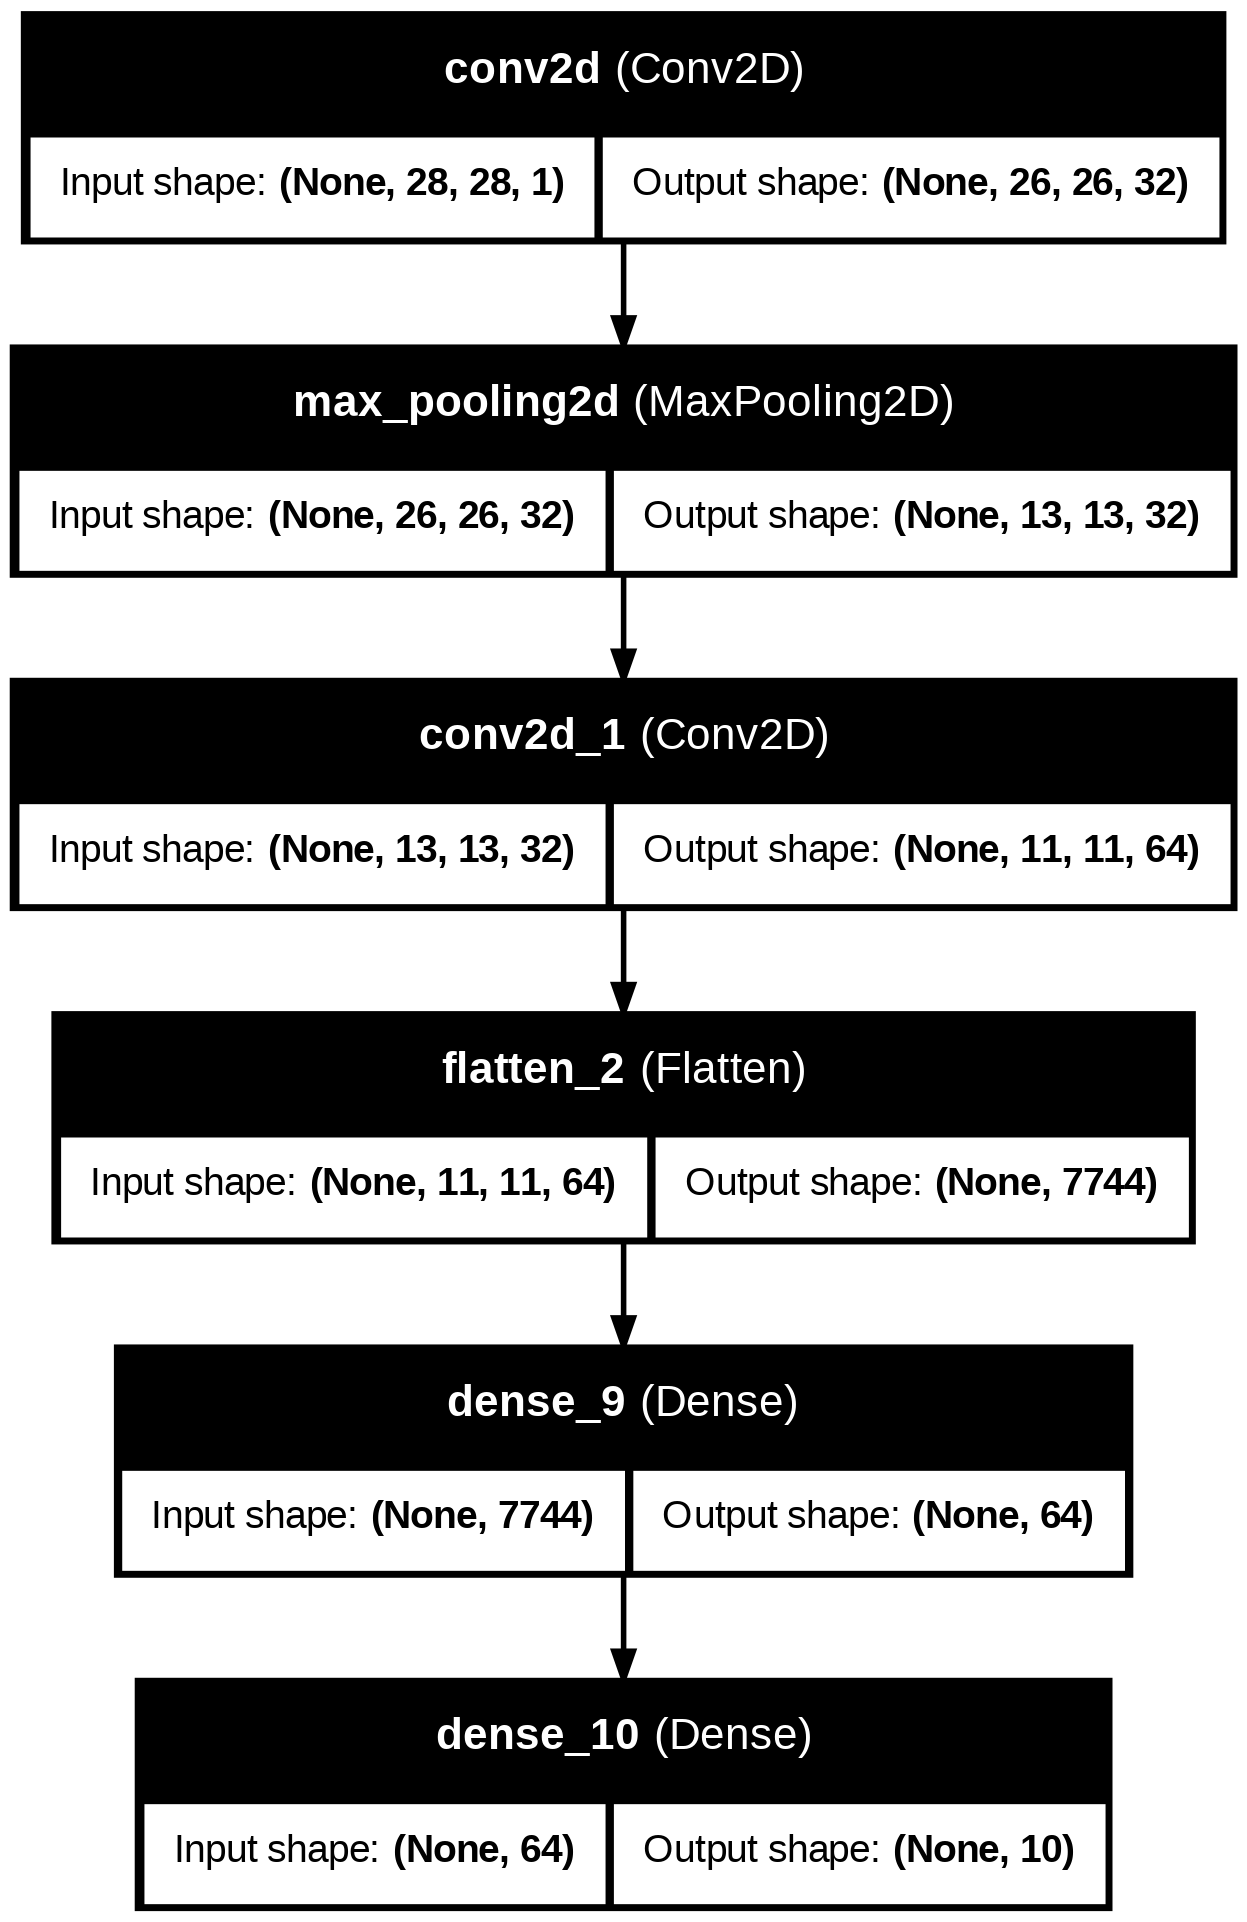

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_cnn, to_file='modelo_cnn.png', show_shapes=True, show_layer_names=True)

(3, 3, 1, 32)


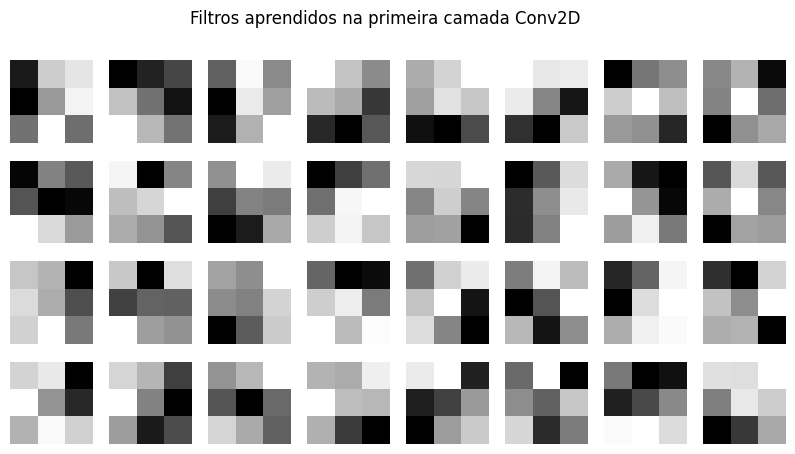

In [ ]:
filters, biases = model_cnn.layers[0].get_weights()
print(filters.shape)  # (3, 3, 1, 32)

fig, axs = plt.subplots(4, 8, figsize=(10, 5))
for i in range(32):
    f = filters[:, :, 0, i]
    ax = axs[i // 8, i % 8]
    ax.imshow(f, cmap='gray')
    ax.axis('off')
plt.suptitle('Filtros aprendidos na primeira camada Conv2D')
plt.show()

(3, 3, 1, 32) Significa: 32 filtros, cada um com 3x3 e profundidade 1 (porque a imagem é em tons de cinza).

Esse comando pega os filtros aprendidos pela primeira camada convolucional, ou seja, os olhos que a rede está usando para detectar padrões como bordas, linhas e texturas na imagem.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


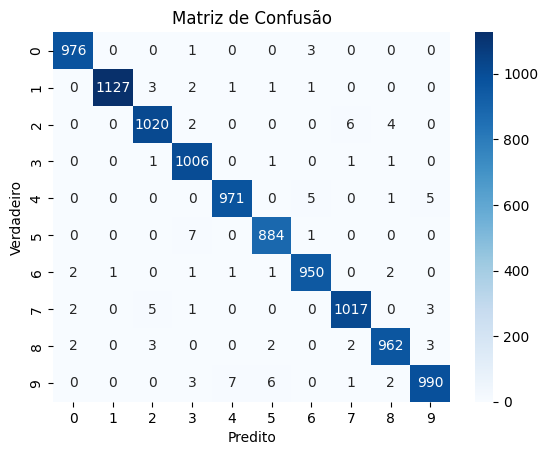

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
y_pred = model_cnn.predict(X_test_cnn).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.ylabel("Verdadeiro")
plt.xlabel("Predito")
plt.show()

print(classification_report(y_test, y_pred))